## HYBRID ADAPTIVE APPROACH FOR PREDICTING CHRONIC KIDNEY DISEASE USING LINEAR DISCRIMINANT ANALYSIS (LDA) AND ARTIFICIAL NEURAL NETWORKS (ANN)

### Importing Required Libraries

In [1]:
# Data Handling
import numpy as np # linear algebra
import pandas as pd # data processing

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 26)



### Data Understanding

In [3]:
# Importing Dataset

df = pd.read_csv('/content/kidney_disease.csv')
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet   pe  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   no   
1    NaN  18.0  0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   no   
2  423.0  53.0  1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   no   
3  117.0  56.0  3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor  yes   
4  106.0  26.0  1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   no   

   ane classification  
0   no            ckd  
1   no            ckd  
2  yes            ckd  
3  yes            ckd  
4   no            ckd

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

### Data Cleaning

In [6]:
df.shape
# Droping the ID column
df.drop('id', axis = 1, inplace = True)

In [7]:
# Assigning more readable column names
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                   NaN        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin packed_cell_volume  \
0               1.2     NaN        NaN         15.4                 44   
1               0.8     NaN        NaN         11.3                 38   
2               1.8     NaN        NaN          9.6                 31   
3               3.8   111.0        2.5         11.2                 32   
4               1.4     NaN        NaN         11.6                 35   

  white_blood_cell_count red_blood_cell_count hypertension diabetes_mellitus  \
0                   7800                  5.2          yes               yes   
1                   6000                  NaN           no                no   
2                   7500                  NaN           no               yes   
3                   6700                  3.9          yes                no   
4                   7300                  4.6           no                no   

  coronary_artery_disease appetite peda_edema aanemia class  
0                      no     good         no      no   ckd  
1                      no     good         no      no   ckd  
2                      no     poor         no     yes   ckd  
3                      no     poor        yes     yes   ckd  
4                      no     good         no      no   ckd

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
# Handling Non-numeric values that should be numeric

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors="coerce")
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors="coerce")
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors="coerce")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [13]:
# Identifying Categorical and Non-categorical Values

num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [14]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [15]:
# Printing Unique category values

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [16]:
# Replacing wrong values

df['diabetes_mellitus'].replace(to_replace={'\tno' :'no' ,'\tyes' :'yes' , ' yes' :'yes'},inplace=True)
df['coronary_artery_disease'].replace(to_replace='\tno' , value='no',inplace=True)
df['class'].replace(to_replace="ckd\t" ,value="ckd",inplace=True)

# Viewing replacement
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [17]:
# Handling Null values

df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [18]:
# Fill not a number with random sampling
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] =random_sample

# Fill not a number with mode
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] =df[feature].fillna(mode)

In [19]:
# Filling nulls with random sampling

for col in num_cols:
    random_value_imputation(col)

df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [20]:
# Filling nulls with mode

for col in cat_cols:
    impute_mode(col)

df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

## Data Visualization

In [21]:
# Data Encoding

from sklearn.preprocessing  import LabelEncoder
encode = LabelEncoder()

for col in cat_cols:
    df[col]=encode.fit_transform(df[col])
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  blood_urea  \
0         1                0         0                 121.0        36.0   
1         1                0         0                  91.0        18.0   
2         1                0         0                 423.0        53.0   
3         0                1         0                 117.0        56.0   
4         1                0         0                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2   139.0        4.4         15.4                44.0   
1               0.8   138.0        3.5         11.3                38.0   
2               1.8   150.0        3.5          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4   147.0        4.9         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0                  7800.0                   5.2             1   
1                  6000.0                   3.4             0   
2                  7500.0                   5.9             0   
3                  6700.0                   3.9             1   
4                  7300.0                   4.6             0   

   diabetes_mellitus  coronary_artery_disease  appetite  peda_edema  aanemia  \
0                  1                        0         0           0        0   
1                  0                        0         0           0        0   
2                  1                        0         1           0        1   
3                  0                        0         1           1        1   
4                  0                        0         0           0        0   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

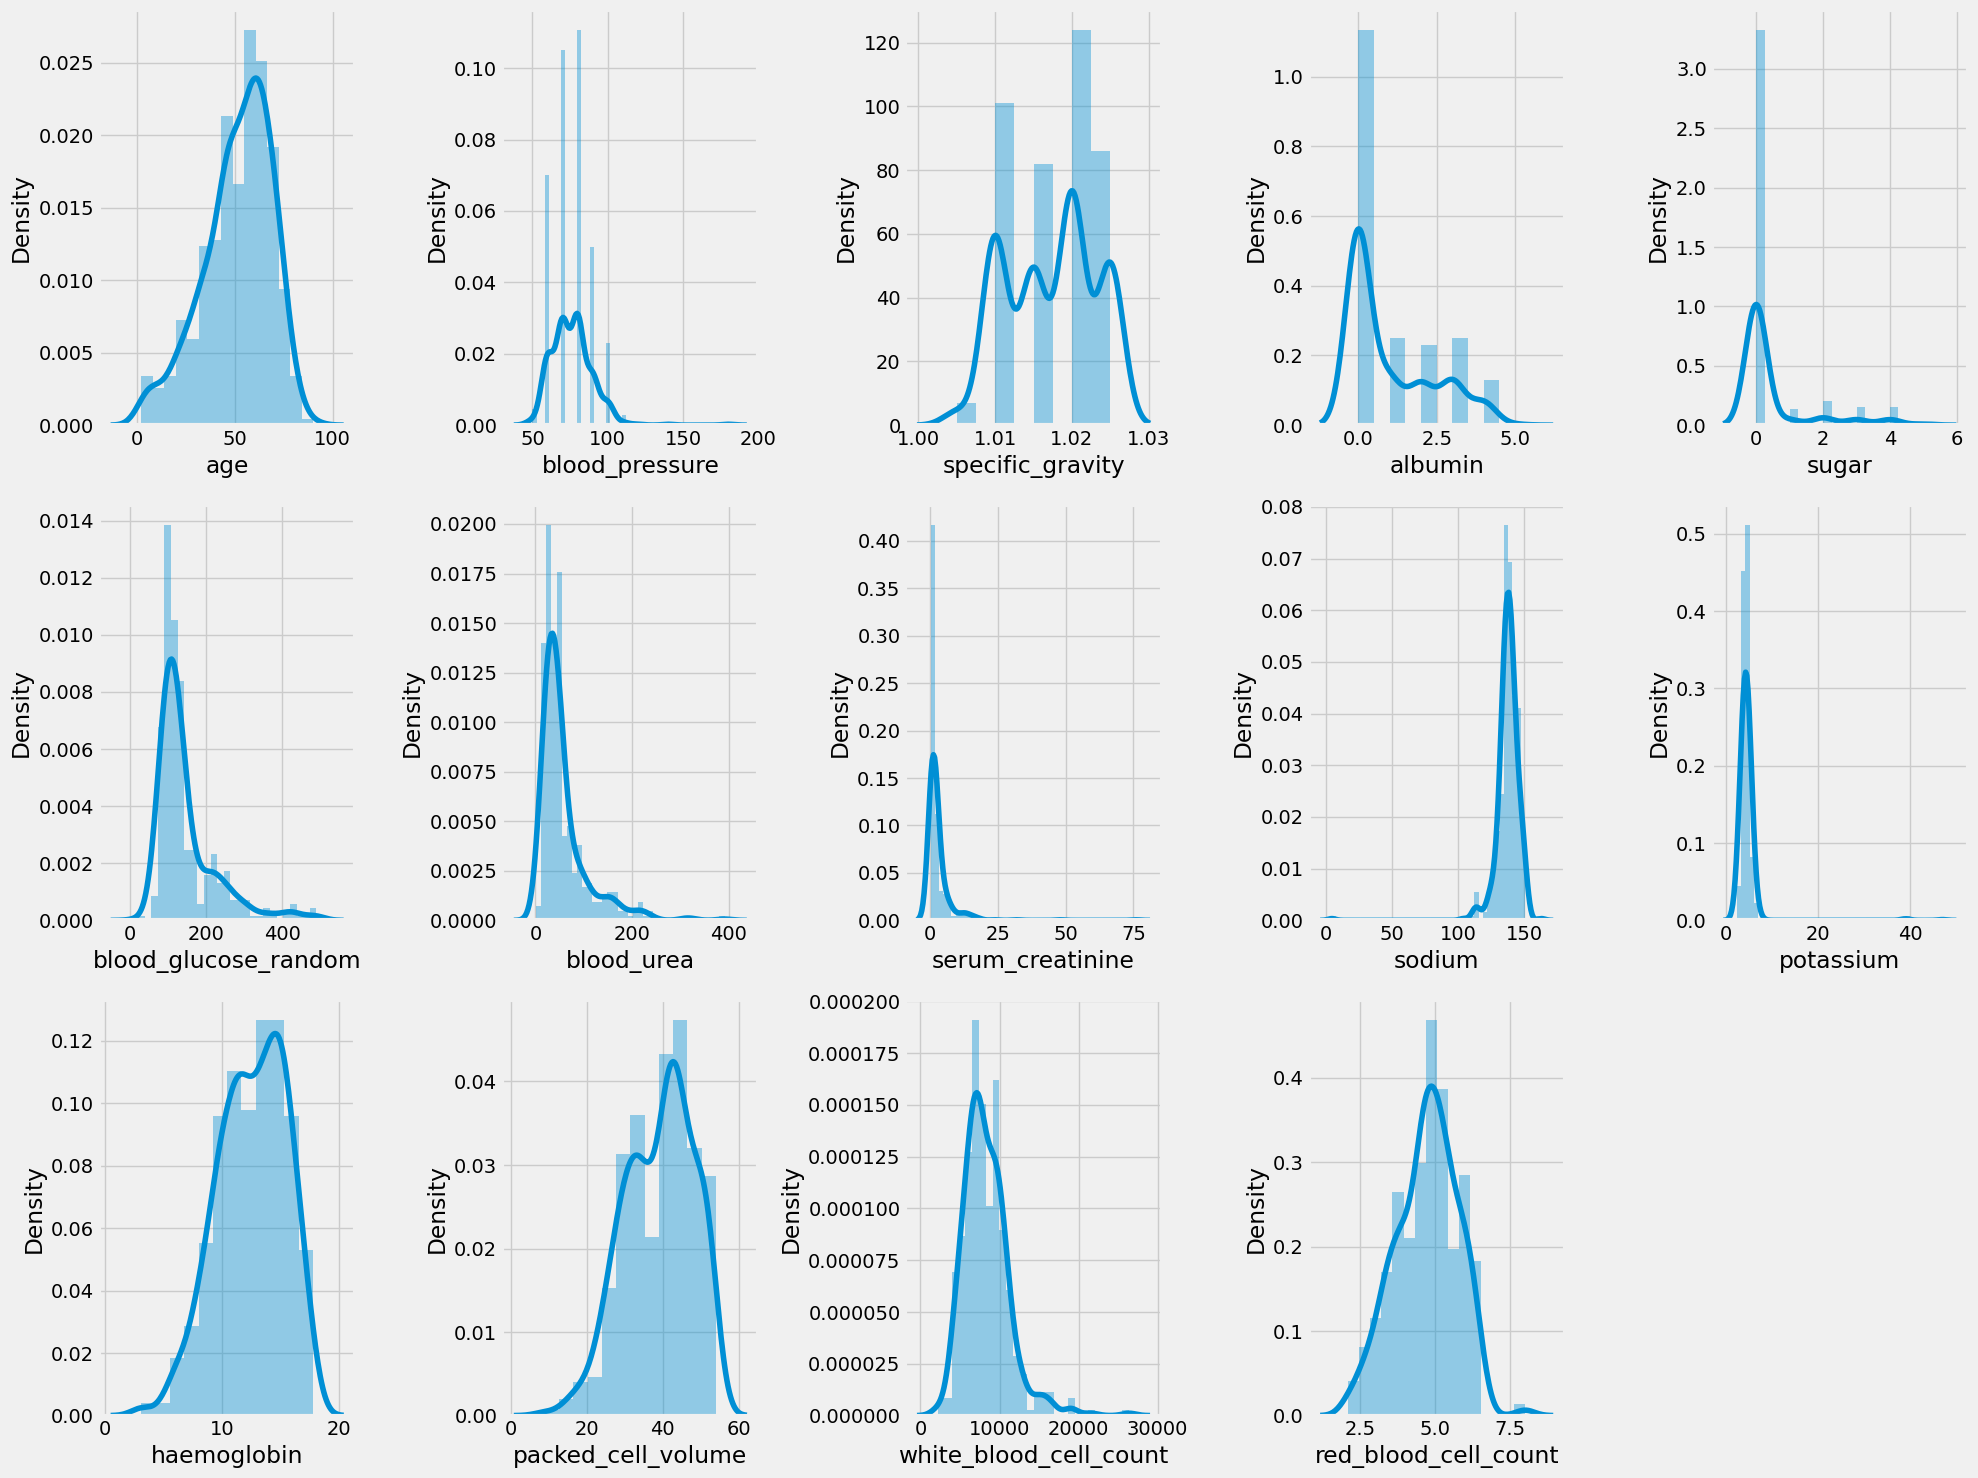

In [22]:
# Visualizing with Seaborn Distplot
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

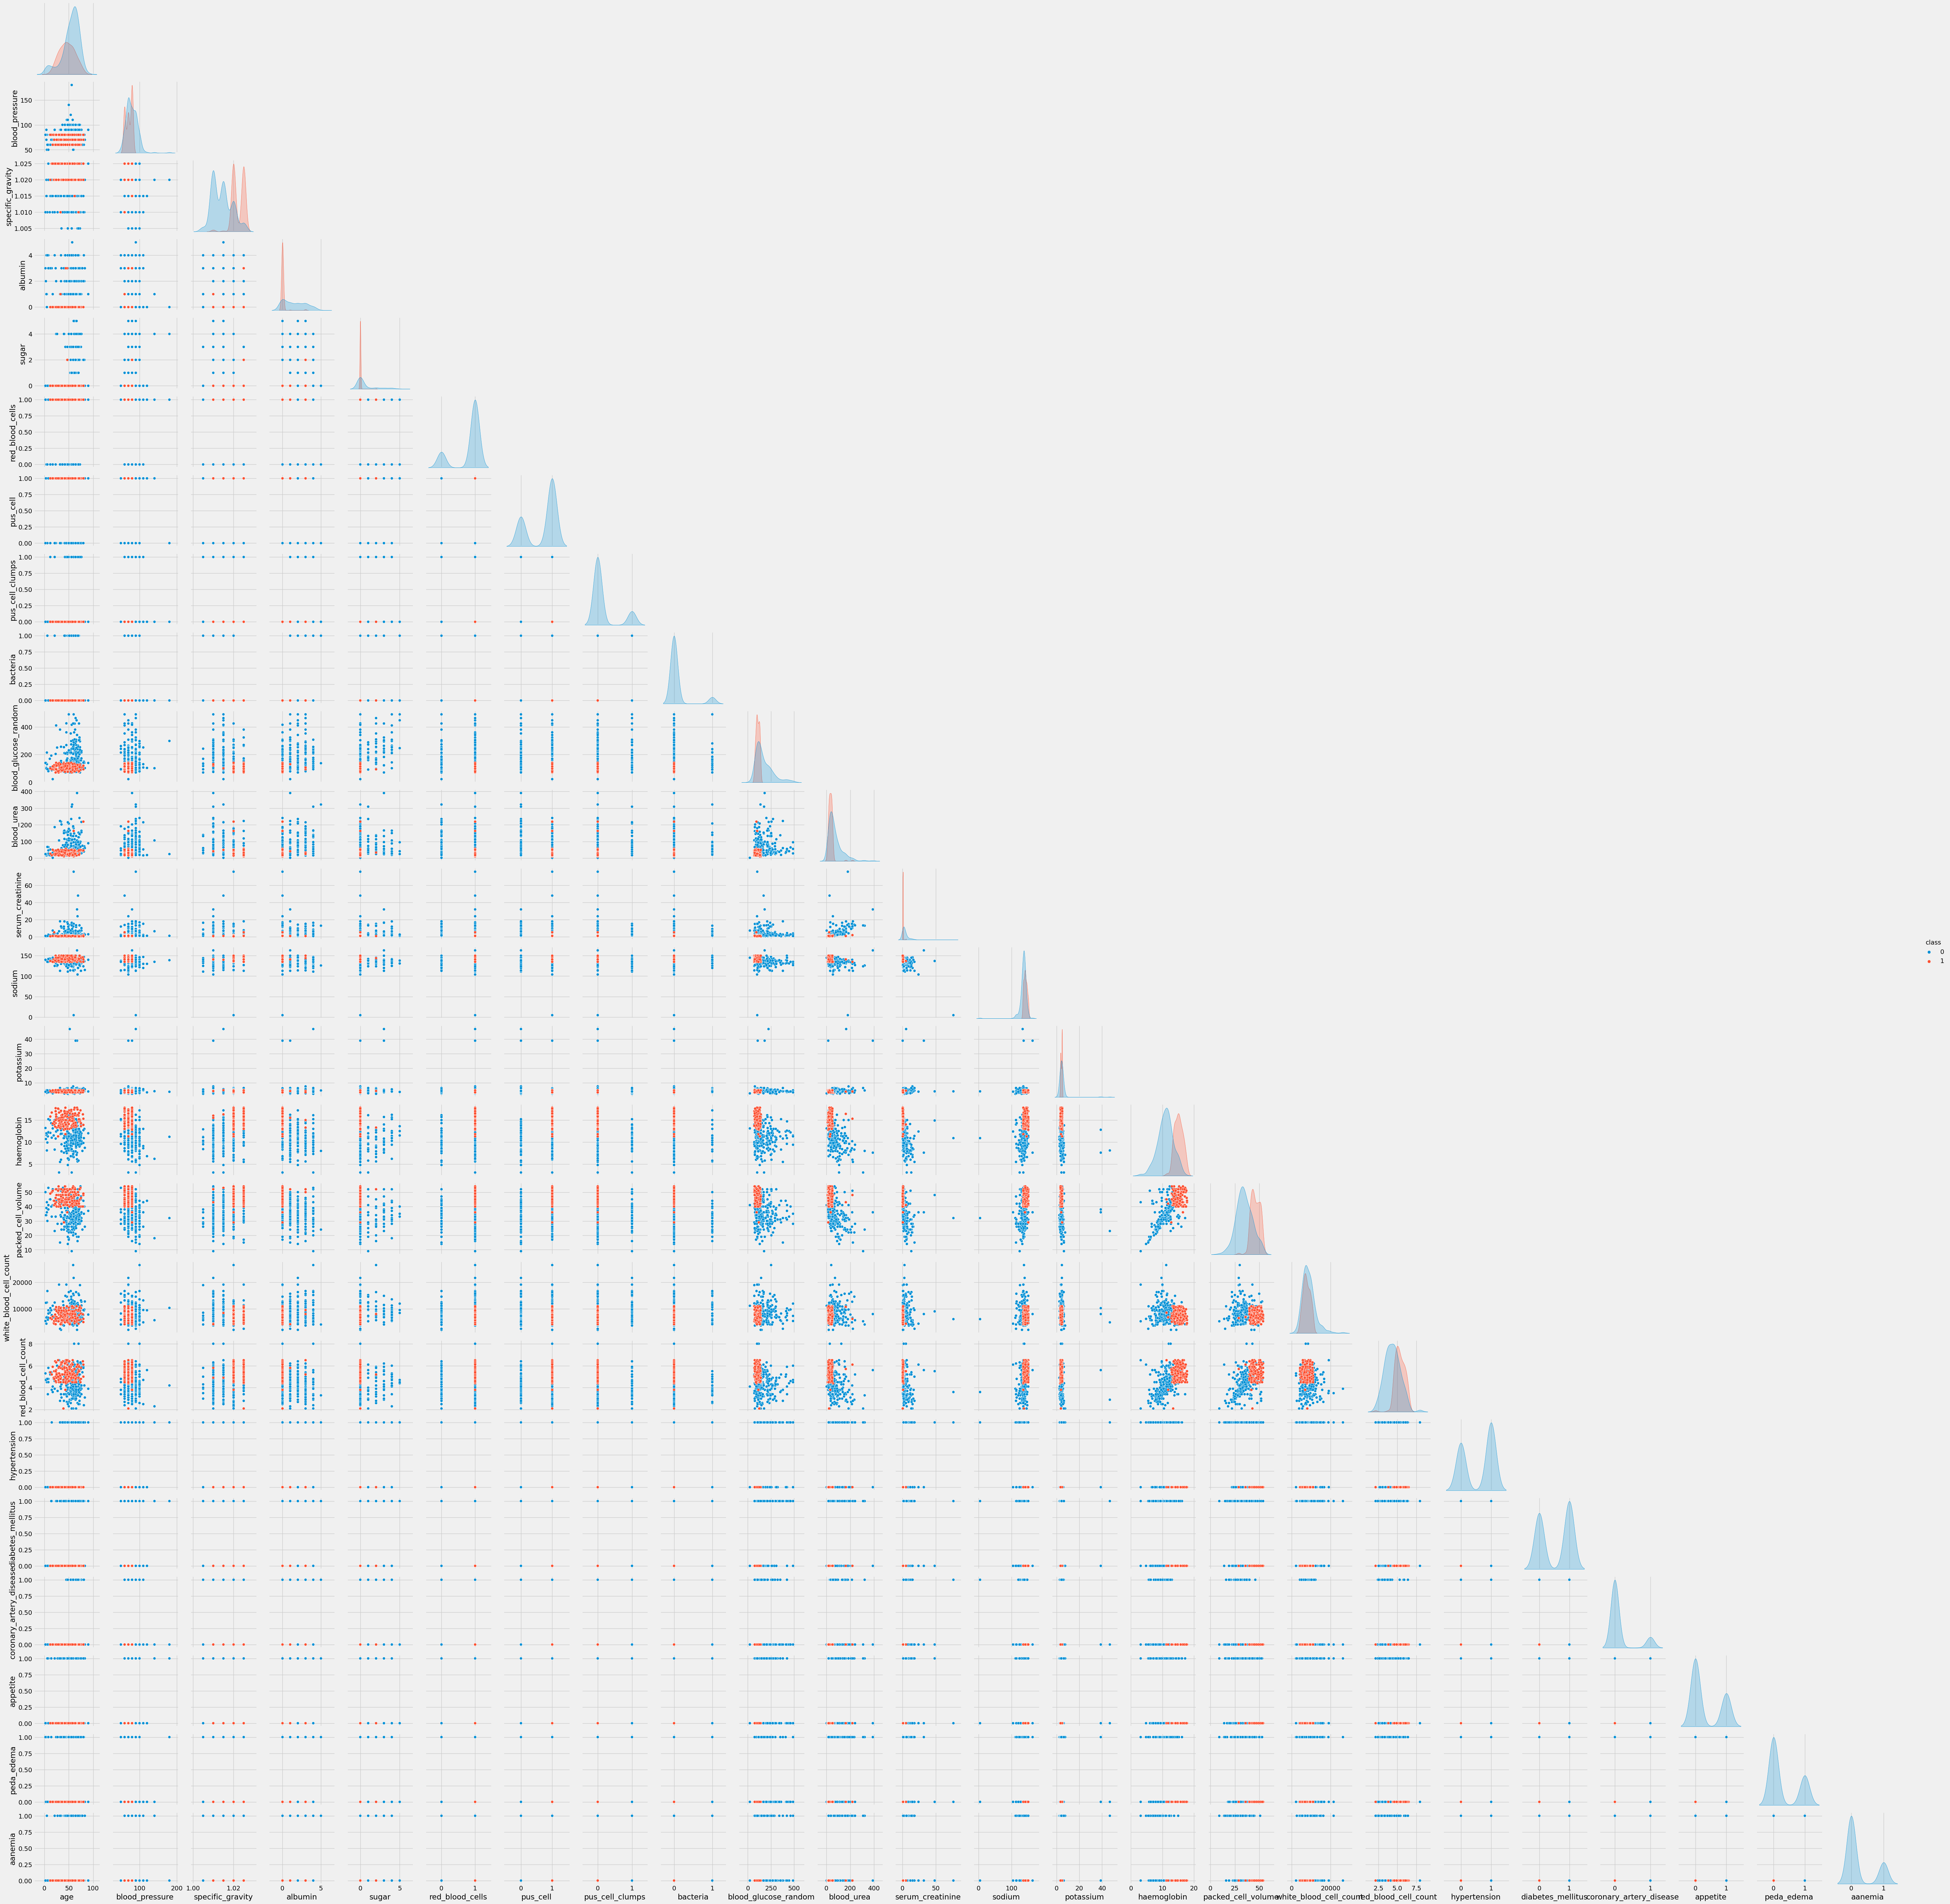

In [23]:
# Viewing with pairplot
sns.pairplot(df, hue="class",corner=True)

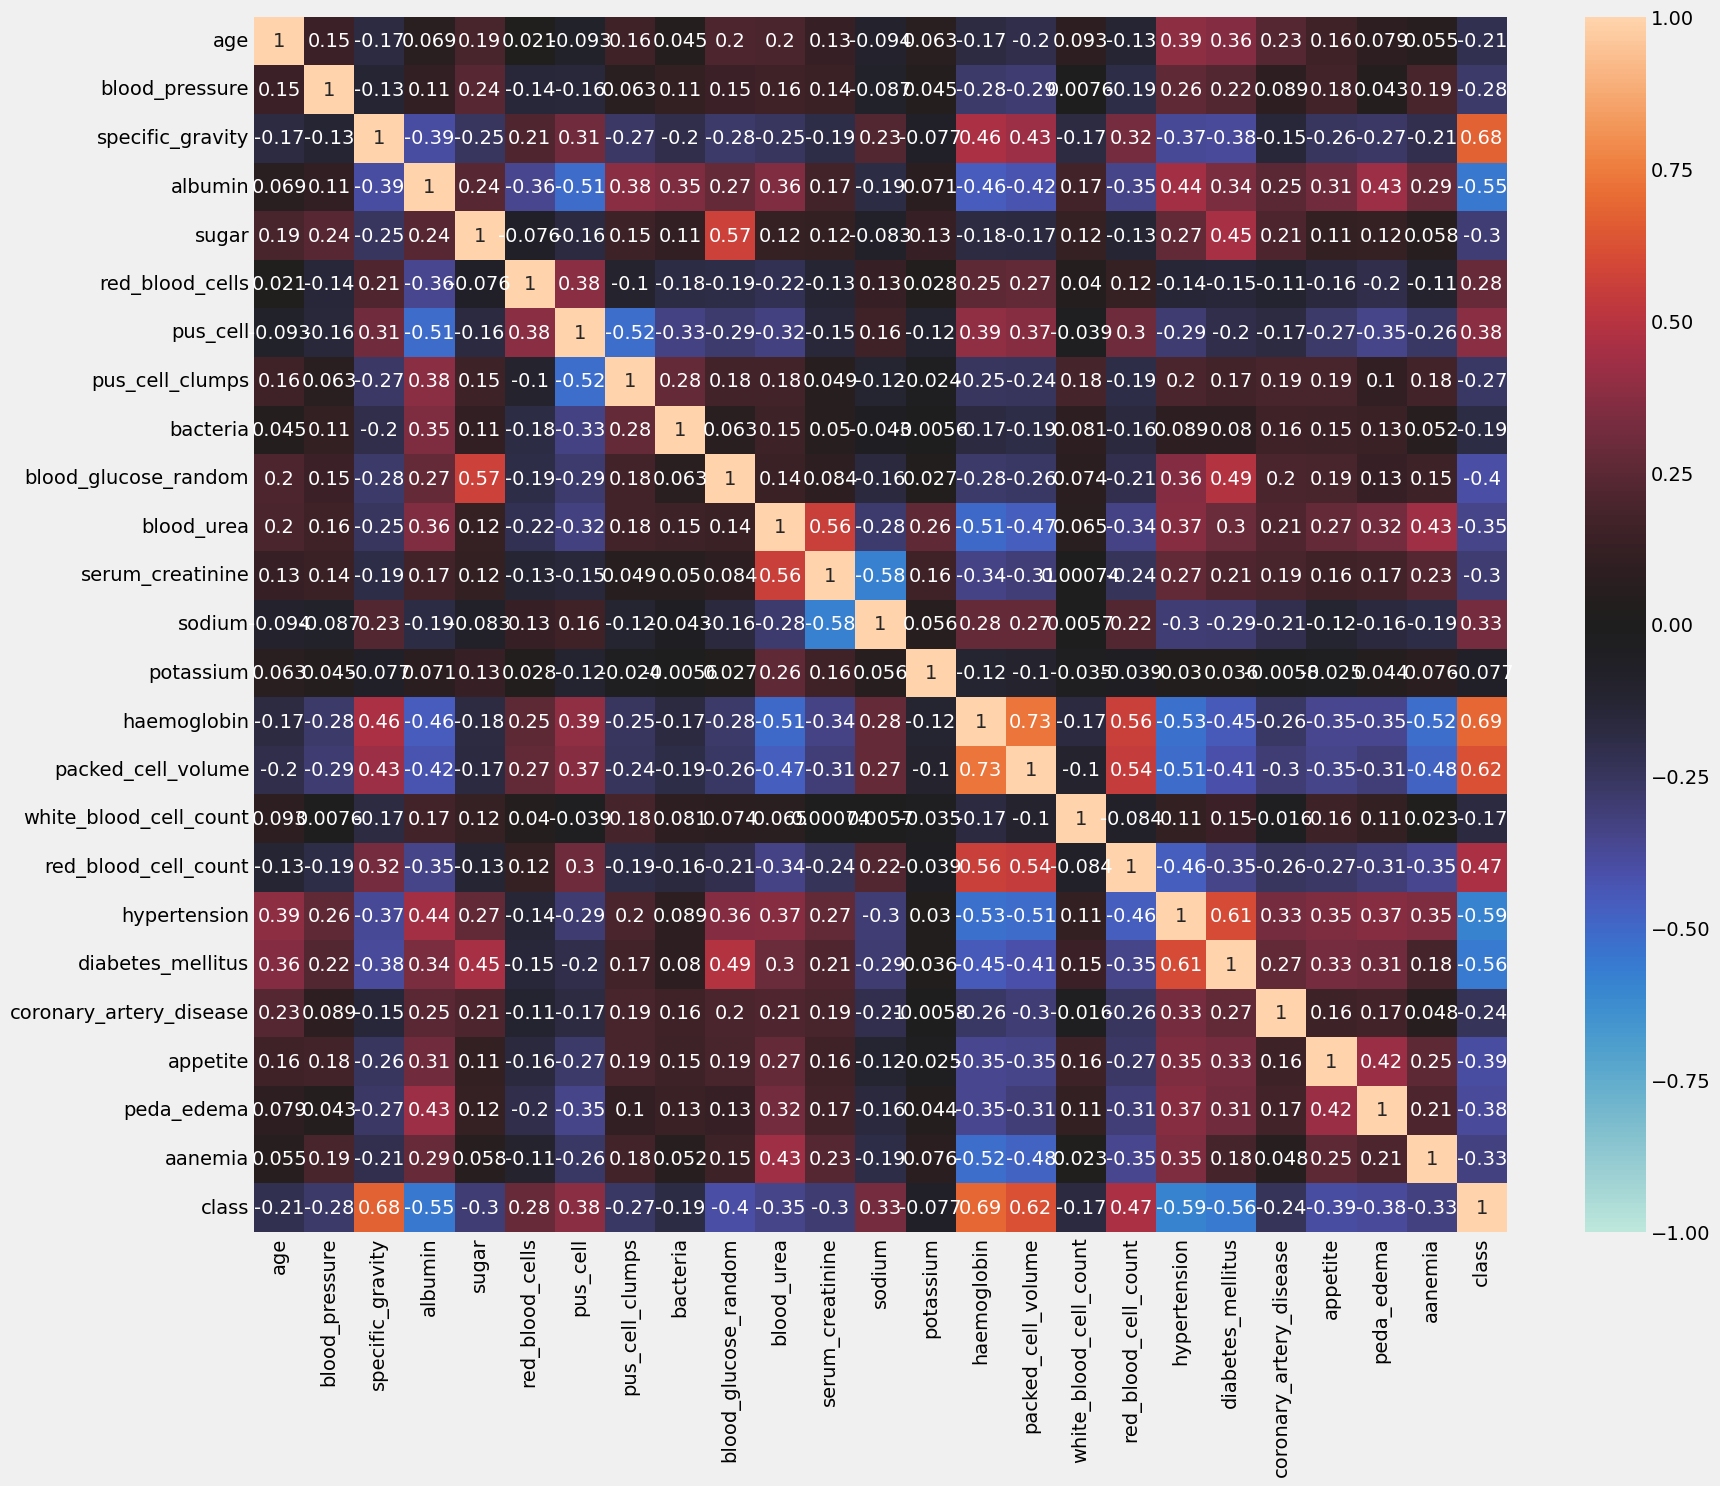

In [24]:
# Plotting Heatmap

corr = df.corr()
plt.subplots(figsize=(18,15))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

## Data Modeling Developmentment

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, classification_report, precision_recall_fscore_support

In [26]:
# Data spliting
X = df.drop(columns ='class' , axis=1)
Y = df['class']

In [27]:
# Scaling Model Parameters

sc = MinMaxScaler()

X = sc.fit_transform(X.to_numpy())

X = pd.DataFrame(X, columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
                               'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume',
                               'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia'])

In [28]:
# Feature Selection
dummy_model = ExtraTreesClassifier()
dummy_model.fit(X,Y)
print(dummy_model.feature_importances_)

[0.00825107 0.01833125 0.16959296 0.10823434 0.00921592 0.01532037
 0.03074539 0.00677106 0.00090391 0.02282132 0.00890149 0.02457233
 0.01209782 0.00809623 0.09483431 0.07554324 0.00753991 0.01895865
 0.14385949 0.12049466 0.00185386 0.05053878 0.028961   0.01356064]


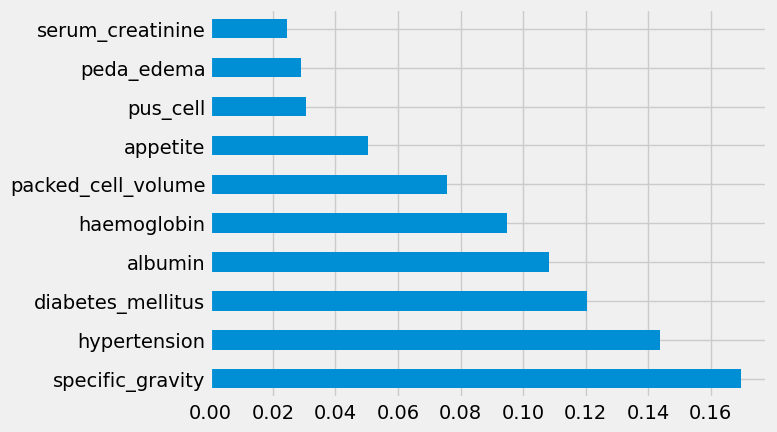

In [29]:
# Identifying the 10 Best best Predictor
feat_importances = pd.Series(dummy_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
selected = ['specific_gravity', 'peda_edema', 'red_blood_cell_count', 'appetite', 'haemoglobin', 'albumin', 'packed_cell_volume', 'diabetes_mellitus', 'blood_glucose_random', 'hypertension']
unselected = list(set(X.columns) - set(selected))

X = X.drop(unselected, axis = 1)

In [31]:
# Data Spliting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [32]:
print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)

X train shape:  (320, 10)
y train shape:  (320,)
X test shape:  (80, 10)
y test shape:  (80,)


## Buidling Trainig Model

### Using Linear Discriminant Analysis

In [34]:
classes = ['CKD', 'NCKD']

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.90      1.00      0.95        28

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

----------------- Overall Results -----------------
Accuracy Result: 96.25%
Precision Result: 95.16%
Recall Result: 97.12%
F1-Score Result: 95.97%


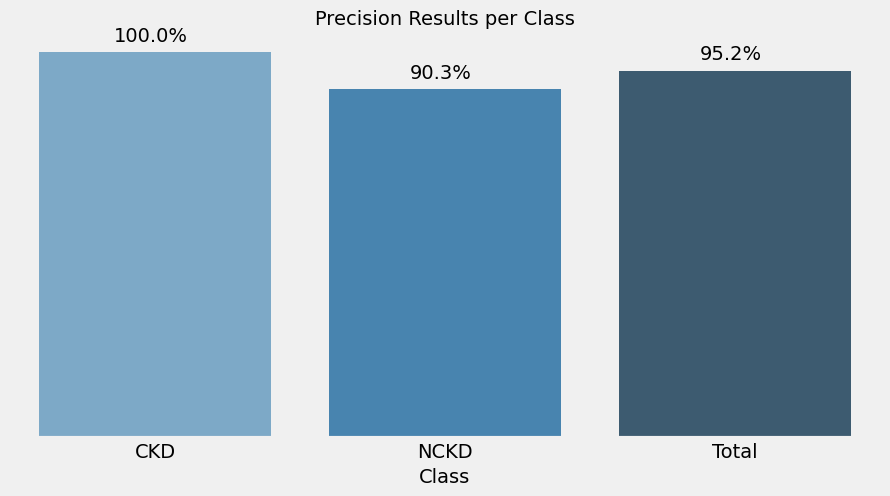

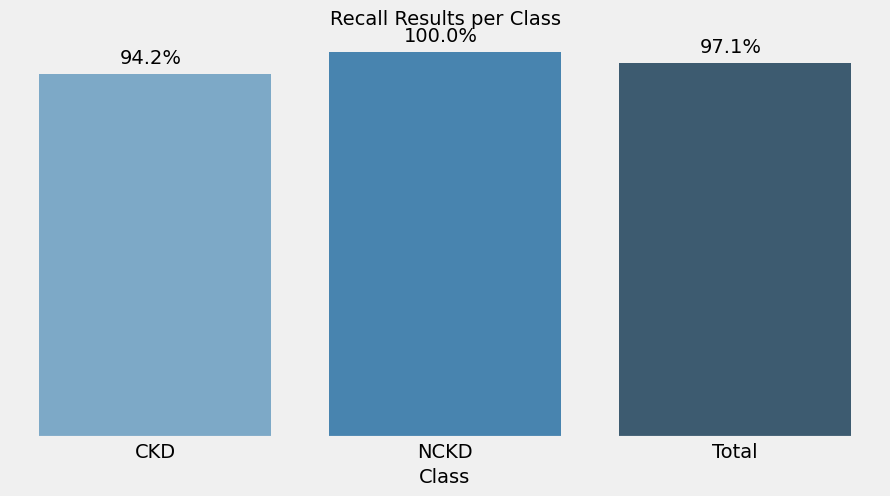

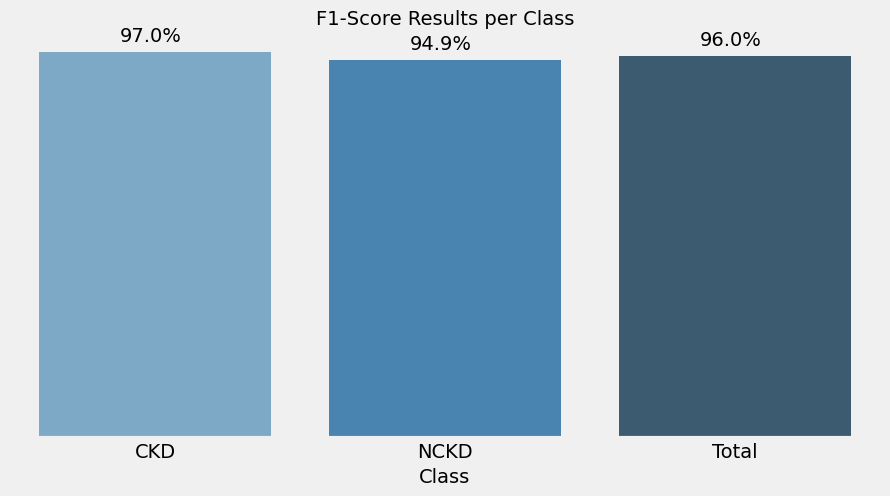

In [35]:
# model fit
knn = LinearDiscriminantAnalysis()
knn.fit(X_train, y_train)

# prediction
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

def metrics_plot(df,metric):
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=df, x=df.index, y=metric, palette = "Blues_d")
    # Bar Labels
    for p in ax.patches:
        ax.annotate("%.1f%%" % (100*p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(-3, 5),rotation = 'horizontal',textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    ax.set_xlabel('Class',fontsize = 14)
    ax.set_ylabel(metric,fontsize = 14)
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False)
    plt.title(metric+ ' Results per Class', fontsize = 14);

metrics_plot(all_df, 'Precision')       # Results by Class
metrics_plot(all_df, 'Recall')          # Results by Class
metrics_plot(all_df, 'F1-Score')         # Results by Class
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   # Accuracy of the whole Dataset
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     # Precision of the whole Dataset
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        # Recall of the whole Dataset
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))      # F1-Score of the whole Dataset

In [36]:
# Model fitting
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Making predictions
predictions = lda_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, predictions))

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculating precision, recall, F1-score, and support for each class and the overall dataset
results_all = precision_recall_fscore_support(y_test, predictions, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, predictions, average=None, zero_division=1)

# Defining metric columns
metric_columns = ['Precision', 'Recall', 'F1-Score', 'Support']

# Creating a DataFrame to store all the metrics
all_metrics_df = pd.concat([pd.DataFrame(list(results_class)).T, pd.DataFrame(list(results_all)).T])
all_metrics_df.columns = metric_columns
all_metrics_df.index = classes + ['Total']

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.90      1.00      0.95        28

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



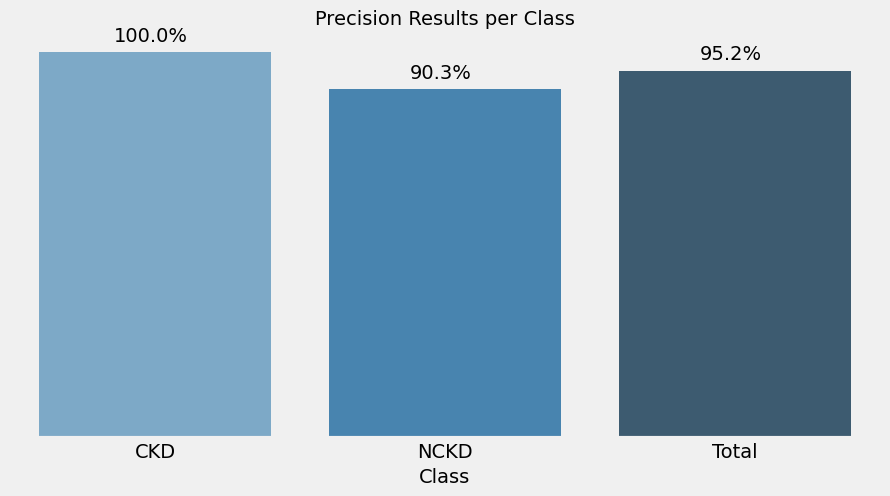

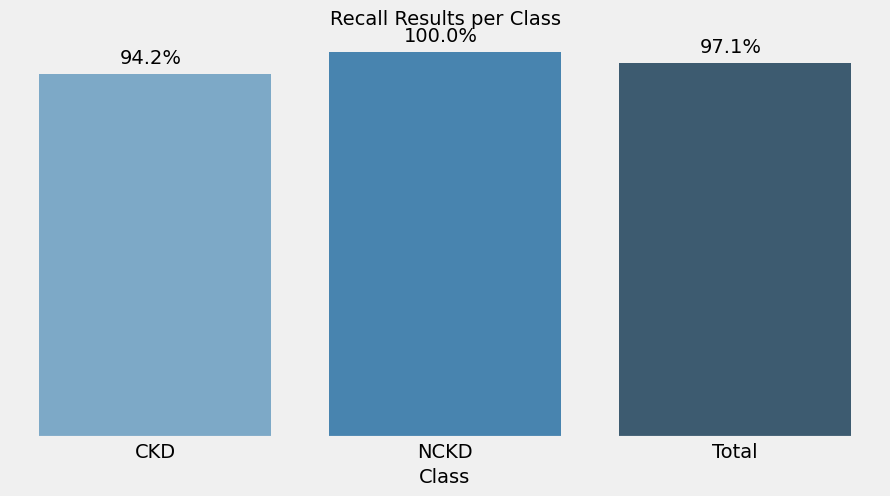

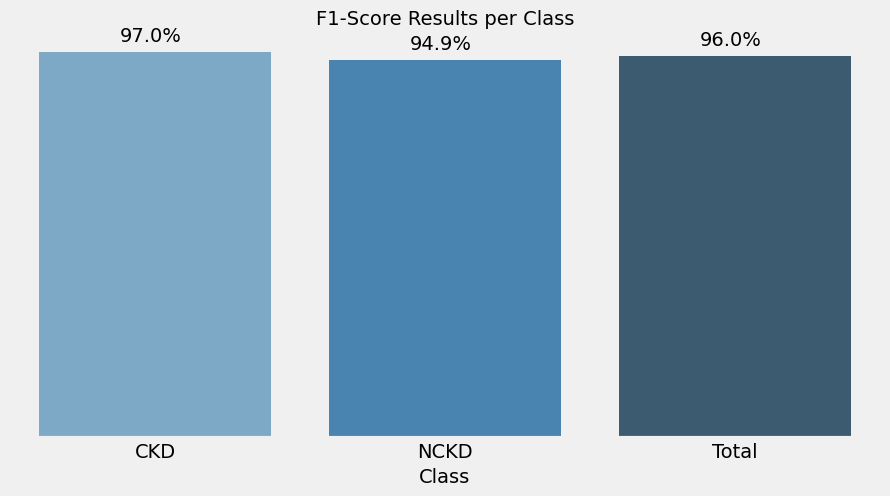

In [37]:
# Function to plot metrics for each class
def plot_metrics(df, metric):
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=df, x=df.index, y=metric, palette="Blues_d")
    # Adding percentage labels to the bars
    for p in ax.patches:
        ax.annotate("%.1f%%" % (100 * p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                    ha='center', va='bottom', color='black', xytext=(-3, 5), rotation='horizontal',
                    textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    ax.set_xlabel('Class', fontsize=14)
    ax.set_ylabel(metric, fontsize=14)
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False)
    plt.title(metric + ' Results per Class', fontsize=14)

# Plotting precision, recall, and F1-Score for each class
plot_metrics(all_metrics_df, 'Precision')  # Results by Class
plot_metrics(all_metrics_df, 'Recall')  # Results by Class
plot_metrics(all_metrics_df, 'F1-Score')  # Results by Class

In [38]:
# Printing overall results
print('----------------- Overall Results -----------------')
print(f'Accuracy Result: {acc * 100:.2f}%')  # Accuracy of the whole Dataset
print(f'Precision Result: {all_metrics_df.iloc[2, 0] * 100:.2f}%')  # Precision of the whole Dataset
print(f'Recall Result: {all_metrics_df.iloc[2, 1] * 100:.2f}%')  # Recall of the whole Dataset
print(f'F1-Score Result: {all_metrics_df.iloc[2, 2] * 100:.2f}%')  # F1-Score of the whole Dataset

----------------- Overall Results -----------------
Accuracy Result: 96.25%
Precision Result: 95.16%
Recall Result: 97.12%
F1-Score Result: 95.97%


### Using Artificial Neural Network

we start by creating a Sequential model with three dense (fully connected) layers for a binary classification task. The various parts of the model's architecture and the compilation step is seen below.

In [40]:
import tensorflow as tf

# Clear the previous TensorFlow session
tf.keras.backend.clear_session()

# Define the neural network model
model = tf.keras.Sequential([
    # Input layer, flattening the input data
    tf.keras.layers.Flatten(input_shape=(X.shape[1],)),

    # First hidden layer with 10 units and ReLU activation
    tf.keras.layers.Dense(10, activation='relu'),

    # Second hidden layer with 5 units and ReLU activation
    tf.keras.layers.Dense(5, activation='relu'),

    # Output layer with 1 unit and Sigmoid activation for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the optimizer (Adam) with a specified learning rate
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Display a summary of the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training Model

We set up early stopping during the training process of the neural network model. The EarlyStopping callback will monitor the validation loss and stop training if it doesn't improve for patience consecutive epochs while keeping the best weights (restore_best_weights=True). The training progress is recorded in the history_ann variable.

In [41]:
import tensorflow as tf

# Define early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    monitor='val_loss',  # Monitor validation loss for early stopping
    restore_best_weights=True,  # Restore model weights to the best state upon early stopping
    verbose=1  # Verbosity level (1: update messages)
)

# Train the model with early stopping
history_ann = model.fit(
    X_train,               # Training data
    y_train,               # Training labels
    validation_split=0.2,  # Fraction of training data to be used for validation
    epochs=50,             # Maximum number of training epochs
    batch_size=32,         # Batch size
    callbacks=[early_stop]  # Early stopping callback
)

Epoch 1/50
8/8 [==============================] - 1s 55ms/step - loss: 0.6426 - accuracy: 0.6055 - val_loss: 0.6415 - val_accuracy: 0.5938
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 0.6281 - accuracy: 0.6133 - val_loss: 0.6274 - val_accuracy: 0.5938
Epoch 3/50
8/8 [==============================] - 0s 12ms/step - loss: 0.6127 - accuracy: 0.6211 - val_loss: 0.6120 - val_accuracy: 0.5938
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.5975 - accuracy: 0.6250 - val_loss: 0.5959 - val_accuracy: 0.5938
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5819 - accuracy: 0.6250 - val_loss: 0.5804 - val_accuracy: 0.5938
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.5672 - accuracy: 0.6250 - val_loss: 0.5661 - val_accuracy: 0.5938
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5529 - accuracy: 0.6250 - val_loss: 0.5528 - val_accuracy: 0.5938
Epoch 8/50
8/8 [=============

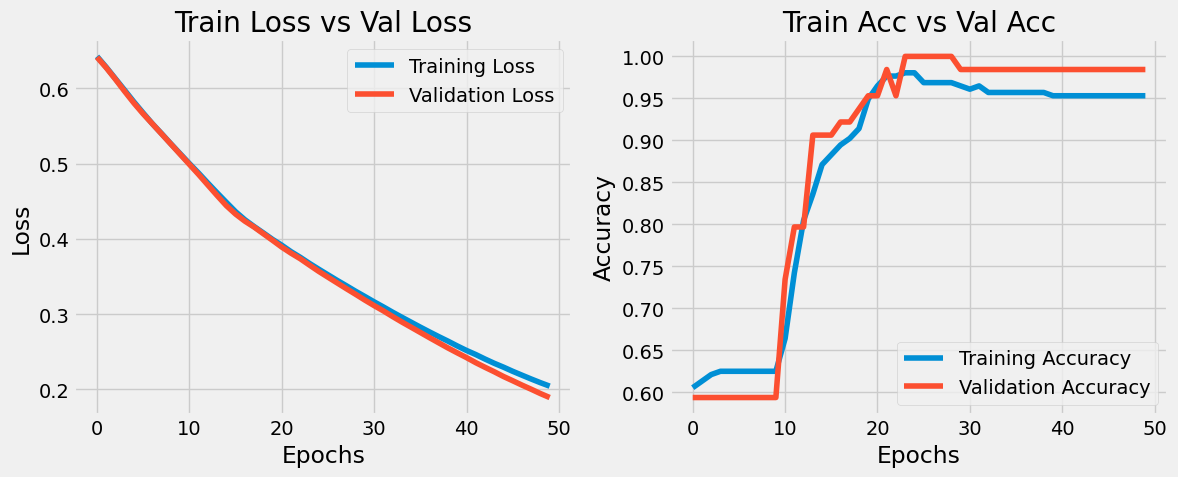

In [45]:
import matplotlib.pyplot as plt

# Extract training history data
loss = history_ann.history['loss']
val_loss = history_ann.history['val_loss']
accuracy = history_ann.history['accuracy']
val_accuracy = history_ann.history['val_accuracy']
epochs = range(len(loss))

# Create subplots for loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation loss
ax[0].plot(epochs, loss, label='Training Loss')
ax[0].plot(epochs, val_loss, label='Validation Loss')
ax[0].legend(loc='upper right')
ax[0].set_title('Train Loss vs Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

# Plot training and validation accuracy
ax[1].plot(epochs, accuracy, label='Training Accuracy')
ax[1].plot(epochs, val_accuracy, label='Validation Accuracy')
ax[1].legend(loc='lower right')
ax[1].set_title('Train Acc vs Val Acc')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')

# Display the plots
plt.tight_layout()
plt.show()

The above plot of two subplots visualizes the training and validation loss as well as training and validation accuracy over the epochs. The loss and val_loss are plotted in the left subplot, and accuracy and val_accuracy are plotted in the right subplot. It provides a visual representation of how the model's performance changes during training.

In [46]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.4 MB/s eta 0:00:00


Defining a flexible neural network architecture with a variable number of hidden layers, neurons per layer, and activation functions, all controlled by hyperparameters defined by Keras Tuner. The learning rate is also tuned as a hyperparameter. This function can be used with Keras Tuner to search for the best hyperparameters specific problem.

In [47]:
import keras_tuner as kt

# Define a function to build the model with hyperparameters
def build_model(hp):
    # Create a Sequential model
    model = tf.keras.Sequential()

    # Determine the number of hidden layers using a hyperparameter
    n_hid_layers = hp.Int('n_hid_layers', 1, 2)
    for layer in range(n_hid_layers):
        # Define the number of neurons and activation function for each hidden layer
        n_neurons = hp.Int(f'n_neurons_{layer}', 5, 125, step=15)
        act = hp.Choice(f'activation_{layer}', ['relu', 'linear', 'sigmoid'])
        model.add(tf.keras.layers.Dense(n_neurons, activation=act))

    # Add the output layer with sigmoid activation for binary classification
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Define a learning rate hyperparameter
    lr = hp.Float('learning_rate', 1e-5, 1e-2)

    # Create an Adam optimizer with the selected learning rate
    opt = tf.keras.optimizers.Adam(learning_rate=lr)

    # Compile the model with binary cross-entropy loss
    model.compile(optimizer=opt, loss='binary_crossentropy')

    return model

In [48]:
# Clear the previous TensorFlow session and reset any associated state
tf.keras.backend.clear_session()

# Create a Keras Tuner BayesianOptimization instance
# - `hypermodel` specifies the model-building function defined earlier
# - `objective` defines the metric to optimize, which is 'val_loss' (validation loss)
# - `max_trials` is the total number of hyperparameter combinations to try
# - `directory` specifies the directory to store tuning logs and checkpoints
# - `project_name` is a unique name for the tuning project
tuner = kt.BayesianOptimization(
    hypermodel=build_model,
    objective='val_loss',
    max_trials=10,
    directory='tuner_dir_0',
    project_name='tune_model'
)

# Print a summary of the search space, which shows the hyperparameters and their possible values
tuner.search_space_summary()

Search space summary
Default search space size: 4
n_hid_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
n_neurons_0 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 125, 'step': 15, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'linear', 'sigmoid'], 'ordered': False}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'linear'}


In [49]:
tuner.search(X_train, y_train, validation_split = 0.2,
             epochs = 100, batch_size = 32)

Trial 10 Complete [00h 00m 14s]
val_loss: 0.02852635085582733

Best val_loss So Far: 0.015085795894265175
Total elapsed time: 00h 02m 05s


In [50]:
tuner.results_summary(3)

Results summary
Results in tuner_dir_0/tune_model
Showing 3 best trials
Objective(name="val_loss", direction="min")

Trial 05 summary
Hyperparameters:
n_hid_layers: 2
n_neurons_0: 35
activation_0: sigmoid
learning_rate: 0.005584847479898779
n_neurons_1: 80
activation_1: linear
Score: 0.015085795894265175

Trial 06 summary
Hyperparameters:
n_hid_layers: 2
n_neurons_0: 80
activation_0: linear
learning_rate: 0.004495945596624993
n_neurons_1: 80
activation_1: linear
Score: 0.015768835321068764

Trial 08 summary
Hyperparameters:
n_hid_layers: 2
n_neurons_0: 110
activation_0: linear
learning_rate: 0.007575001170661
n_neurons_1: 5
activation_1: relu
Score: 0.019609637558460236


In [51]:
# Retraining Best Model

model = build_model(tuner.get_best_hyperparameters()[0])
model.build(input_shape=(None,) + X_train.shape[1:])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 35)                385       
                                                                 
 dense_3 (Dense)             (None, 80)                2880      
                                                                 
 dense_4 (Dense)             (None, 1)                 81        
                                                                 
Total params: 3346 (13.07 KB)
Trainable params: 3346 (13.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 10, monitor = 'val_loss',
                                              restore_best_weights = True,
                                              verbose = 1)

history = model.fit(X_train, y_train, validation_split = 0.2,
                    epochs = 500, batch_size = 32, callbacks = [early_stop])

Epoch 1/500
8/8 [==============================] - 1s 31ms/step - loss: 0.6467 - val_loss: 0.6115
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 0.5337 - val_loss: 0.4739
Epoch 3/500
8/8 [==============================] - 0s 10ms/step - loss: 0.4289 - val_loss: 0.3462
Epoch 4/500
8/8 [==============================] - 0s 9ms/step - loss: 0.3117 - val_loss: 0.2494
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.2183 - val_loss: 0.1648
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1570 - val_loss: 0.1300
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1188 - val_loss: 0.0894
Epoch 8/500
8/8 [==============================] - 0s 9ms/step - loss: 0.0928 - val_loss: 0.0862
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 0.0857 - val_loss: 0.0559
Epoch 10/500
8/8 [==============================] - 0s 9ms/step - loss: 0.0668 - val_loss: 0.0485
Epoch 11/500
8/8 [=========

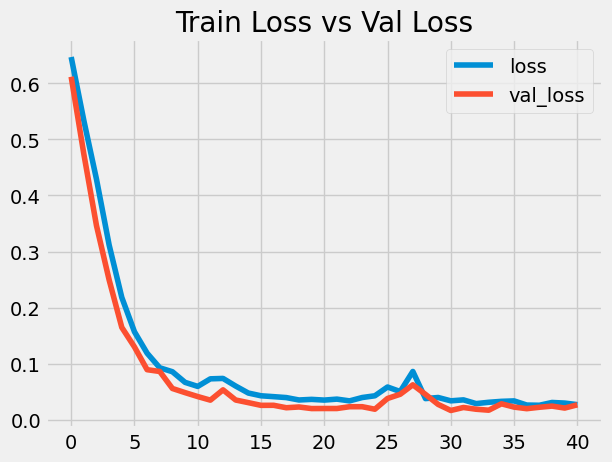

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Train Loss vs Val Loss')
plt.show()

In [59]:
# Evaluation

model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0361


0.03607771918177605

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



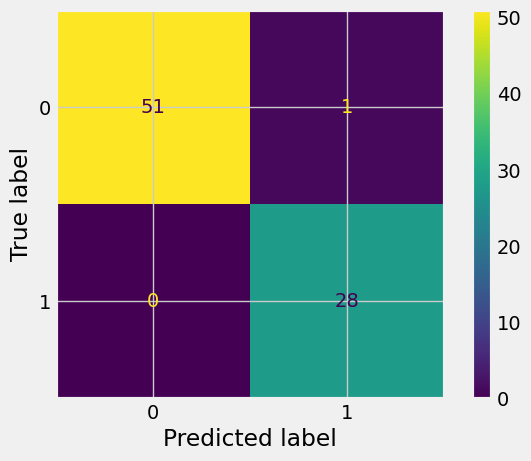

In [60]:
#predicting with model
prob = model.predict(X_test) #probability of patient has ckd
y_pred = np.round(prob)
#the probability rounded so
#y_pred = 1 means ckd and y_pred = 0 means notckd

#confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_mat).plot()

#classification report
print(classification_report(y_test, y_pred))

In [56]:
# Saving Model Artifcat
import joblib
joblib.dump(model,'model_CKD.pkl')

['model_CKD.pkl']

## Making Inference

In [ ]:
print(X.iloc[0:1,:])

   specific_gravity  albumin  blood_glucose_random  haemoglobin  \
0              0.75      0.2              0.211538     0.836735   

   packed_cell_volume  red_blood_cell_count  hypertension  diabetes_mellitus  \
0            0.777778              0.525424           1.0                1.0   

   appetite  peda_edema  
0       0.0         0.0  


In [63]:
import joblib
import numpy as np

# Load the saved model
def load_model(model_path):
    try:
        model = joblib.load(model_path)
        return model
    except Exception as e:
        print(f"Error loading the model: {str(e)}")
        return None

# Make predictions using the loaded model
def predict(model, input_data):
    try:
        # Ensure input_data is a numpy array
        input_data = np.array(input_data)

        # Perform predictions
        predictions = model.predict(input_data)
        return predictions
    except Exception as e:
        print(f"Error making predictions: {str(e)}")
        return None

if __name__ == "__main__":
    # Define the path to the saved model artifact
    model_path = '/content/model_CKD.pkl'

    # Load the model
    loaded_model = load_model(model_path)

    if loaded_model:
        # Define your input data for prediction (replace with your actual data)
        input_data = [
            [0.75, 0.2,  0.211538, 0.836735,
             0.777778, 0.525424, 1.0, 1.0,
             0.0, 0.0]
        ]

        # Make predictions using the loaded model
        predictions = predict(loaded_model, input_data)

        if predictions:
            print("Predictions:")
            print(predictions)

1/1 [==============================] - 0s 67ms/step
Predictions:
[[6.5928384e-07]]


In [64]:
X.columns

Index(['specific_gravity', 'albumin', 'blood_glucose_random', 'haemoglobin',
       'packed_cell_volume', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'appetite', 'peda_edema'],
      dtype='object')

In [65]:
X.head()

specific_gravity  albumin  blood_glucose_random  haemoglobin  \
0              0.75      0.2              0.211538     0.836735   
1              0.75      0.8              0.147436     0.557823   
2              0.25      0.4              0.856838     0.442177   
3              0.00      0.8              0.202991     0.551020   
4              0.25      0.4              0.179487     0.578231   

   packed_cell_volume  red_blood_cell_count  hypertension  diabetes_mellitus  \
0            0.777778              0.525424           1.0                1.0   
1            0.644444              0.220339           0.0                0.0   
2            0.488889              0.644068           0.0                1.0   
3            0.511111              0.305085           1.0                0.0   
4            0.577778              0.423729           0.0                0.0   

   appetite  peda_edema  
0       0.0         0.0  
1       0.0         0.0  
2       1.0         0.0  
3       1.0         1.0  
4       0.0         0.0

In [67]:
print(tf.__version__)

2.13.0
